# Alex Henczel

#How has the standard for movie length, genre distribution and age rating changed over the last 40 years. 
Is there any correlation between newer movies being more graphic IE having a large portion of movies each year being mature vs pg13 
How as movie length changed over the last 40 years
Has the distribution of movie genres changed over the last 40 years

I plan on sorting the data to eliminate the data that doesnt it the criteria, such as being incomplete ie data points that dont contain a rating and or year released .  i plan to add graphs and charts to represent the distribution such as movie genre variety or age rating percentage. 


For my first EDA I filtered 3/4 data sets. I ran into some issues with hulu; the feature length/age rating column combined for some reason and i couldnt figureout how to fix it (im going into office hours to get help). I combined any similiar lables, such as 18+ and R, removed the unrated rows and removed any data that didnt match with the rest. I made 3 pie charts sinces its a simple way to show a distribution with lots of data like this. My next goal will be to split this every further, some of our sets have upwards of 10,000 rows meaning i should be able to get a fairly significant number of data points for each year/decade. I will split the data further and compare the distributions.

I still need to explore the other questions, but based on what ive done so far my nex questions are:

#### 1. What is the genre distribution per year and or decade
#### 2. What service contains the most amount of features from before and after the century changed
#### 3. Which services are geared more towards kids, and which feature more adult content
#### 4. How does average movie length compare for each genre on average 

Milestone 4 task 1:
First: 
I loaded in my data
Planned what viusals i was going to use based on my data.
Removed any columns that werent needed
Removed any rows that didnt provide any information (such as NA rows, or unrated features)
Collected the data in the form I wanted it to be, such as using the groupby function
I then plotted the charts I wanted and performed PDA on them.

Milestone 4 task 3: A few of my later plots, such as the average genre distribution and the Facetgrid plot still need to be fixed. I need to relabel a few things such as he title/axis. I also need to find a decent chart i can use to properly convey the percent difference of features before and after the centruy change. Just looking at the numbers, there is a large difference betweem the different services. A proper graph will allow this to be easily conveyed. This will answer my 2nd research question. Once I finish relabeling my facetgrid plot, I should be able to answer my first research question. I was pondering the idea of changing the number of features from a specific genre by year, from a count to a percent. This should hopefully fix the skewed data that has occured due to the lack of data from before the 21st century.

As for the third research question, I plotted the distribution of genres for all 4 services, and the average for all of them. Using this we can see that disney plus is by far the most suited towards kids, as almost all content that has been rated and entered into this data base is acceptable for children 13 and under. I might try to regraph this using multiple barcharts to better portray the difference between each service. I also want to recolour each chart, so each genre has a designated colour. I think creating percents for each genre by serivce would be an excellent idea for marketting. Being able to say that X streaming service is better suited for kids, while Y is better suited for adults isnt something ive seen before.

Lastly I havent had the chance to pursue the last research question.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

NF = pd.read_csv("../data/raw/netflix_titles.csv")
DP = pd.read_csv("../data/raw/disney_plus_titles.csv")
AP = pd.read_csv("../data/raw/amazon_prime_titles.csv")
HU = pd.read_csv("../data/raw/hulu_titles.csv")



In [ ]:
def load_and_process(url_or_path_to_csv_file):
    yearRating_NF=(
    pd.read_csv(url_or_path_to_csv_file)
    .loc[lambda x: x['rating']!='66 min']
    .loc[lambda x: x['rating']!='74 min']
    .loc[lambda x: x['rating']!='84 min']
    .loc[lambda x: x['rating']!='UR']
    .loc[lambda x: x['rating']!='NR']
    .loc[lambda x: x['rating']!='NC-17']
    .loc[lambda x: x['rating']!='TV-Y7-FV'] 
    .drop(['show_id','type','title','director','cast','country','date_added','duration','listed_in','description'],axis=1)
    .dropna()) 
    return yearRating_NF

In [ ]:
NF2=load_and_process("../data/raw/netflix_titles.csv")
yearRating_NF=load_and_process("../data/raw/netflix_titles.csv").groupby(['rating']).count()

In [ ]:

yearRating_DP= DP.drop(['show_id','type','title','director','cast','country','date_added','duration','listed_in','description'],axis=1)
yearRating_DP.dropna()

for i in range(yearRating_DP['rating'].count()):
 if yearRating_DP.rating[i] == 'TV-Y7-FV':
       yearRating_DP.rating[i] = 'TV-Y7'

DP2=yearRating_DP
yearRating_DP=yearRating_DP.groupby(['rating']).count()


In [ ]:
yearRating_AP= AP.drop(['show_id','type','title','director','cast','country','date_added','duration','listed_in','description'],axis=1)
yearRating_AP.dropna()


for i in range(yearRating_AP['rating'].count()):
    if yearRating_AP.rating[i] == 'ALL_AGES':
       yearRating_AP.rating[i] = 'ALL'
    elif yearRating_AP.rating[i] == '16':
       yearRating_AP.rating[i] = '16+'
    elif yearRating_AP.rating[i] == 'AGES_16_':
       yearRating_AP.rating[i] = '16+'
    elif yearRating_AP.rating[i] == 'AGES_18_':
       yearRating_AP.rating[i] = '18+' 
    elif yearRating_AP.rating[i] == 'NC-17':
       yearRating_AP.rating[i] = 'R'
    
for i in range(yearRating_AP['rating'].count()):   
    if yearRating_AP.rating[i] == '7+':
       yearRating_AP.rating[i] = 'TV-Y7'
    elif yearRating_AP.rating[i] == '18+':
       yearRating_AP.rating[i] = 'R'
    elif yearRating_AP.rating[i] == '13+':
       yearRating_AP.rating[i] = 'PG-13'
    elif yearRating_AP.rating[i] == '16+':
       yearRating_AP.rating[i] = 'PG-MA'
    elif yearRating_AP.rating[i] == 'ALL':
       yearRating_AP.rating[i] = 'G'

yearRating_AP=yearRating_AP[yearRating_AP.rating !='NOT_RATE']
yearRating_AP=yearRating_AP[yearRating_AP.rating !='UNRATED']
yearRating_AP=yearRating_AP[yearRating_AP.rating !='TV-NR']
yearRating_AP=yearRating_AP[yearRating_AP.rating !='NR']
yearRating_AP=yearRating_AP[yearRating_AP.rating !='18+']
yearRating_AP=yearRating_AP[yearRating_AP.rating !='16+']
yearRating_AP=yearRating_AP[yearRating_AP.rating !='13+']
yearRating_AP=yearRating_AP[yearRating_AP.rating !='7+']
yearRating_AP=yearRating_AP[yearRating_AP.rating !='ALL']
AP2=yearRating_AP
yearRating_AP=yearRating_AP.groupby(yearRating_AP['rating']).count()


In [ ]:
yearRating_HU= HU.drop(['show_id','type','title','director','cast','country','date_added','listed_in','description'],axis=1)
yearRating_HU.dropna(how='any', inplace=True)

yearRating_HU=yearRating_HU[yearRating_HU.rating !='NR']
yearRating_HU=yearRating_HU[yearRating_HU.rating !='NOT RATED']

yearRating_HU= yearRating_HU.drop(['duration'],axis=1)
HU2=yearRating_HU
yearRating_HU=yearRating_HU.groupby(['rating']).count()


Text(0, 0.5, ' ')

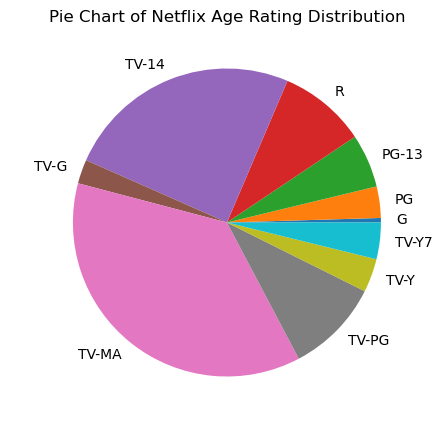

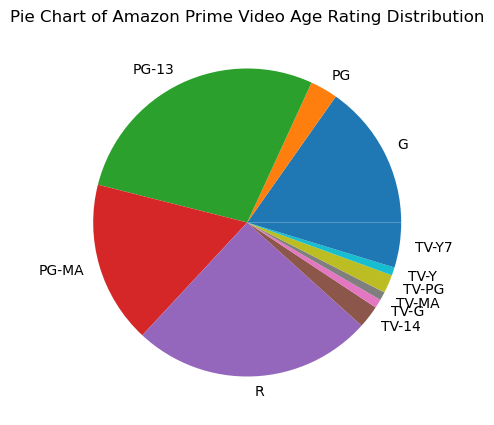

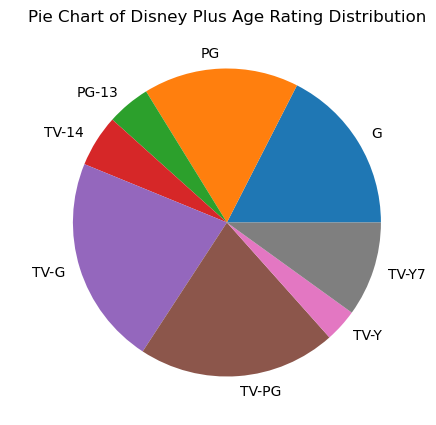

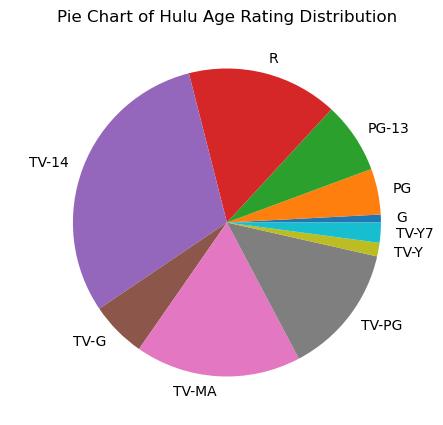

In [ ]:
YR_plot_NF=yearRating_NF.plot.pie(y='release_year',figsize=(5,5), title='Pie Chart of Netflix Age Rating Distribution')
YR_plot_NF.get_legend().remove()
YR_plot_NF.set_ylabel(" ")

YR_plot_AP=yearRating_AP.plot.pie(y='release_year',figsize=(5,5), title='Pie Chart of Amazon Prime Video Age Rating Distribution')
YR_plot_AP.get_legend().remove()
YR_plot_AP.set_ylabel(" ")

YR_plot_DP=yearRating_DP.plot.pie(y='release_year',figsize=(5,5), title='Pie Chart of Disney Plus Age Rating Distribution')
YR_plot_DP.get_legend().remove()
YR_plot_DP.set_ylabel(" ")

YR_plot_HU=yearRating_HU.plot.pie(y='release_year',figsize=(5,5), title='Pie Chart of Hulu Age Rating Distribution')
YR_plot_HU.get_legend().remove()
YR_plot_HU.set_ylabel(" ")

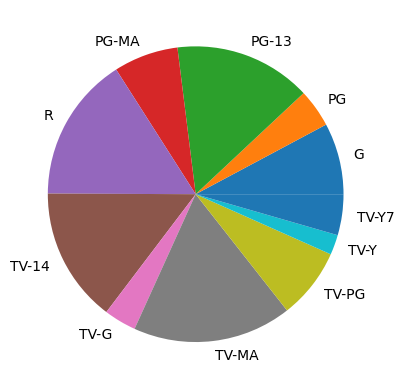

In [ ]:
merge=(
    pd.concat([NF2,DP2,AP2,HU2])
    .rename(columns={"rating": "Rating"})
    .rename(columns={"release_year": "Release Year"})
    .reset_index(drop=True)
    .groupby(['Rating']).count()
)

YR_plot_merge1=(
    plt.pie(data=merge,x=merge['Release Year'],
    labels=['G','PG','PG-13','PG-MA','R','TV-14','TV-G','TV-MA','TV-PG','TV-Y','TV-Y7'])

)


# could not find a way to add a title. This Graph is the average distribution for each genre over all 4 streaming services

[Text(0.5, 23.52222222222222, 'Number of Features Release in that Year'),
 Text(50.722222222222214, 0.5, 'Year')]

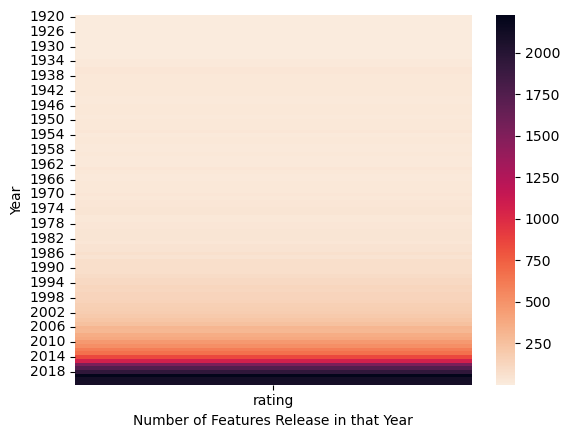

In [ ]:
year=(
    pd.concat([NF2,DP2,AP2,HU2])
    .groupby(['release_year']).count()
)
year_plot=(sns.heatmap(year,fmt=".3f",cmap="rocket_r"))
year_plot.set(xlabel='Number of Features Release in that Year', ylabel='Year')


In [ ]:

df1 = [NF2,DP2,AP2,HU2]

year=pd.concat(df1)

plt.figure(figsize=(3,6))
sns.set_theme(style="whitegrid",font_scale=1.3)


plot = sns.FacetGrid(year, col="rating", hue="rating", col_wrap=3)
plot.map(sns.histplot,"release_year")

In [ ]:
# % of movies from before or after century

NF_perc=NF.drop(['show_id','type','title','director','cast','country','date_added','duration','listed_in','description'],axis=1)
beforeNF=0
afterNF=0
for i in range(NF_perc['rating'].count()):
    if NF_perc.release_year[i]<2000:
        beforeNF=beforeNF+1
    else: 
        afterNF = afterNF+1

NF_perc=NF_perc.groupby(['release_year']).count()

DP_perc=DP.drop(['show_id','type','title','director','cast','country','date_added','duration','listed_in','description'],axis=1)
beforeDP=0
afterDP=0
for i in range(DP_perc['rating'].count()):
    if DP_perc.release_year[i]<2000:
        beforeDP=beforeDP+1
    else: 
        afterDP = afterDP+1

DP_perc=DP_perc.groupby(['release_year']).count()
pctbDP=(beforeDP*100)/(beforeDP+afterDP)
pctaDP=(afterDP*100)/(beforeDP+afterDP)

AP_perc=AP.drop(['show_id','type','title','director','cast','country','date_added','duration','listed_in','description'],axis=1)
beforeAP=0
afterAP=0
for i in range(AP_perc['rating'].count()):
    if AP_perc.release_year[i]<2000:
        beforeAP=beforeAP+1
    else: 
        afterAP = afterAP+1

AP_perc=AP_perc.groupby(['release_year']).count()
pctbAP=(beforeAP*100)/(beforeAP+afterAP)
pctaAP=(afterAP*100)/(beforeAP+afterAP)

HU_perc=HU.drop(['show_id','type','title','director','cast','country','date_added','duration','listed_in','description'],axis=1)
beforeHU=0
afterHU=0
for i in range(HU_perc['rating'].count()):
    if HU_perc.release_year[i]<2000:
        beforeHU=beforeHU+1
    else: 
        afterHU = afterHU+1

HU_perc=HU_perc.groupby(['release_year']).count()
pctbHU=(beforeHU*100)/(beforeHU+afterHU)
pctaHU=(afterHU*100)/(beforeHU+afterHU)


pct=[[pctbNF,pctbDP,pctbAP,pctbHU],[pctaNF,pctaDP,pctaAP,pctaHU]]

pct1 = pd.DataFrame(pct, columns=['Netflix','Disney Plus','Amazon Prime', 'Hulu'],index=['Before 2000','After 2000'])
pct2=pct1.transpose()
pct2


,Before 2000,After 2000
Netflix,5.963876,94.036124
Disney Plus,26.261230,73.738770
Amazon Prime,17.511521,82.488479
Hulu,7.598903,92.401097
